# REST APIs & Web Scraping

## REST APIs

### Import 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

### NBI API

In [3]:
%pip install nba_api

Note: you may need to restart the kernel to use updated packages.


In [58]:
from nba_api.stats.static import teams
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats

In [59]:
nba_teams = teams.get_teams()

In [60]:
print("Nombre d'équipes : ", len(nba_teams), "\n")
print(nba_teams)

Nombre d'équipes :  30 

[{'id': 1610612737, 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL', 'nickname': 'Hawks', 'city': 'Atlanta', 'state': 'Georgia', 'year_founded': 1949}, {'id': 1610612738, 'full_name': 'Boston Celtics', 'abbreviation': 'BOS', 'nickname': 'Celtics', 'city': 'Boston', 'state': 'Massachusetts', 'year_founded': 1946}, {'id': 1610612739, 'full_name': 'Cleveland Cavaliers', 'abbreviation': 'CLE', 'nickname': 'Cavaliers', 'city': 'Cleveland', 'state': 'Ohio', 'year_founded': 1970}, {'id': 1610612740, 'full_name': 'New Orleans Pelicans', 'abbreviation': 'NOP', 'nickname': 'Pelicans', 'city': 'New Orleans', 'state': 'Louisiana', 'year_founded': 2002}, {'id': 1610612741, 'full_name': 'Chicago Bulls', 'abbreviation': 'CHI', 'nickname': 'Bulls', 'city': 'Chicago', 'state': 'Illinois', 'year_founded': 1966}, {'id': 1610612742, 'full_name': 'Dallas Mavericks', 'abbreviation': 'DAL', 'nickname': 'Mavericks', 'city': 'Dallas', 'state': 'Texas', 'year_founded': 1980}, {'id':

In [61]:
dft = pd.DataFrame(nba_teams)
dft

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
8,1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967
9,1610612746,Los Angeles Clippers,LAC,Clippers,Los Angeles,California,1970


In [62]:
# --- Liste des joueurs à analyser ---
superstars = ['LeBron James', 'Stephen Curry', 'Kevin Durant', 'Kobe Bryant']

def get_player_id(name):
    player = players.find_players_by_full_name(name)
    return player[0]['id'] if player else None

def get_player_stats(player_name):
    pid = get_player_id(player_name)
    if not pid:
        print(f"ID non trouvé pour {player_name}")
        return None
    time.sleep(1)  # éviter les blocages de requêtes
    stats = playercareerstats.PlayerCareerStats(player_id=pid)
    df = stats.get_data_frames()[0]
    df['PLAYER_NAME'] = player_name
    return df[['SEASON_ID', 'TEAM_ABBREVIATION', 'PLAYER_NAME', 'PTS', 'AST', 'REB']]

# Récupérer les stats pour chaque joueur
all_stats = pd.concat([get_player_stats(player) for player in superstars], ignore_index=True)

# Sauvegarde dans data/
all_stats.to_csv('data/nba_superstars_stats.csv', index=False)
print("✅ Données sauvegardées dans data/nba_superstars_stats.csv")


✅ Données sauvegardées dans data/nba_superstars_stats.csv


In [63]:
all_stats

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_NAME,PTS,AST,REB
0,2003-04,CLE,LeBron James,1654,465,432
1,2004-05,CLE,LeBron James,2175,577,588
2,2005-06,CLE,LeBron James,2478,521,556
3,2006-07,CLE,LeBron James,2132,470,526
4,2007-08,CLE,LeBron James,2250,539,592
...,...,...,...,...,...,...
72,2011-12,LAL,Kobe Bryant,1616,264,313
73,2012-13,LAL,Kobe Bryant,2133,469,433
74,2013-14,LAL,Kobe Bryant,83,38,26
75,2014-15,LAL,Kobe Bryant,782,197,199


C:\Users\alfa1\AppData\Local\Temp\ipykernel_20512\817991463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_stats['SEASON'] = df['SEASON_ID'].str[:4].astype(int)


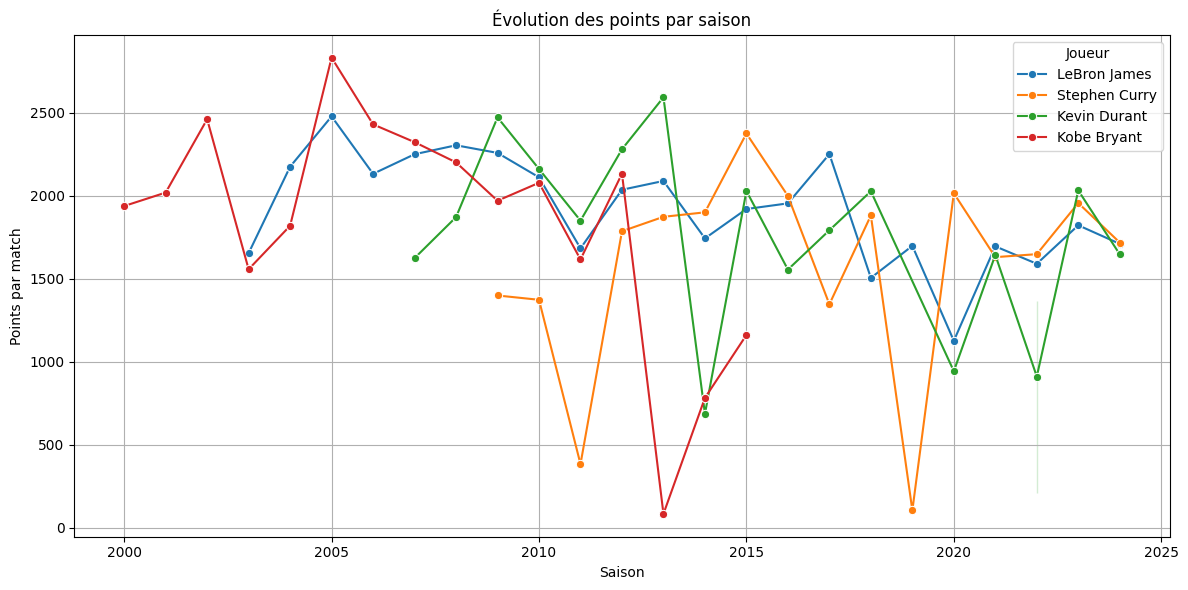

In [ ]:
# Lecture des données

# Nettoyage et formatage
all_stats = all_stats[all_stats['SEASON_ID'].str.startswith('2')]  # garder saisons 2000+
all_stats['SEASON'] = df['SEASON_ID'].str[:4].astype(int)

# Visualisation
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_stats, x='SEASON', y='PTS', hue='PLAYER_NAME', marker='o')
plt.title('Évolution des points par saison')
plt.xlabel('Saison')
plt.ylabel('Points par match')
plt.legend(title='Joueur')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/points_per_season.png')
plt.show()


In [29]:
def get_player_stats(player_name):
    player_dict = players.find_players_by_full_name(player_name)
    if player_dict:
        player_id = player_dict[0]['id']
        stats = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
        stats = stats[stats['SEASON_ID'] == stats['SEASON_ID'].max()]  # Dernière saison
        stats['Player'] = player_name
        return stats
    else:
        return None

player_names = ['LeBron James', 'Stephen Curry', 'Kevin Durant', 'Nikola Jokic', 'Luka Doncic']

nba_stats = pd.concat([get_player_stats(name) for name in player_names if get_player_stats(name) is not None], ignore_index=True)
nba_stats = nba_stats[['Player', 'TEAM_ID', 'GP', 'PTS', 'AST', 'REB', 'FG_PCT', 'FG3_PCT', 'FT_PCT']]
nba_stats.head()


,Player,TEAM_ID,GP,PTS,AST,REB,FG_PCT,FG3_PCT,FT_PCT
0,LeBron James,1610612747,70,1710,575,546,0.513,0.376,0.782
1,Stephen Curry,1610612744,70,1718,421,310,0.448,0.397,0.933
2,Kevin Durant,1610612756,62,1647,263,374,0.527,0.430,0.839
3,Nikola Jokic,1610612743,70,2071,716,892,0.576,0.417,0.800
4,Luka Doncic,1610612742,22,619,172,183,0.464,0.354,0.767


In [33]:
def get_player_stats(player_name, n_seasons=5):
    player_dict = players.find_players_by_full_name(player_name)
    if player_dict:
        player_id = player_dict[0]['id']
        stats = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]

        # Trier par saison décroissante et prendre les 10 dernières
        stats = stats.sort_values(by='SEASON_ID', ascending=False).head(n_seasons)
        stats['Player'] = player_name

        # Garder uniquement les colonnes utiles
        stats = stats[['Player', 'SEASON_ID', 'TEAM_ID', 'GP', 'PTS', 'AST', 'REB', 'FG_PCT', 'FG3_PCT', 'FT_PCT']]
        return stats
    else:
        return None

player_names = ['LeBron James', 'Stephen Curry', 'Kevin Durant', 'Nikola Jokic', 'Luka Doncic']

# Fusionner les stats de tous les joueurs
nba_stats = pd.concat(
    [get_player_stats(name) for name in player_names if get_player_stats(name) is not None],
    ignore_index=True
)

nba_stats.head(10)


,Player,SEASON_ID,TEAM_ID,GP,PTS,AST,REB,FG_PCT,FG3_PCT,FT_PCT
0,LeBron James,2024-25,1610612747,70,1710,575,546,0.513,0.376,0.782
1,LeBron James,2023-24,1610612747,71,1822,589,518,0.540,0.410,0.750
2,LeBron James,2022-23,1610612747,55,1590,375,457,0.500,0.321,0.768
3,LeBron James,2021-22,1610612747,56,1695,349,459,0.524,0.359,0.756
4,LeBron James,2020-21,1610612747,45,1126,350,346,0.513,0.365,0.698
5,Stephen Curry,2024-25,1610612744,70,1718,421,310,0.448,0.397,0.933
6,Stephen Curry,2023-24,1610612744,74,1956,379,330,0.450,0.408,0.923
7,Stephen Curry,2022-23,1610612744,56,1648,352,341,0.493,0.427,0.915
8,Stephen Curry,2021-22,1610612744,64,1630,404,335,0.437,0.380,0.923
9,Stephen Curry,2020-21,1610612744,63,2015,363,345,0.482,0.421,0.916


## Web Scraping

In [2]:
%pip install bs4
%pip install requests pandas html5lib 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

In [11]:
url = "https://www.worldometers.info/coronavirus/"

In [12]:
response = requests.get(url)

In [6]:
%pip install lxml


Note: you may need to restart the kernel to use updated packages.


In [14]:
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
table = soup.find("table") 


for row in table.find_all("tr"):
    cells = row.find_all(["th", "td"])  # th = en-têtes, td = données
    cell_values = [cell.get_text(strip=True) for cell in cells]
    print(cell_values)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']
['', 'North America', '131,889,132', '', '1,695,941', '', '127,665,129', '+350', '2,528,062', '6,095', '', '', '', '', '', 'North America', '', '', '', '', '', '']
['', 'Asia', '221,500,265', '', '1,553,662', '', '205,673,091', '', '14,273,512', '14,733', '', '', '', '', '', 'Asia', '', '', '', '', '', '']
['', 'Europe', '253,406,198', '', '2,101,824', '', '248,754,104', '+474', '2,550,270', '4,453', '', '', '', '', '', 'Europe', '', '', '', '', '', '']
['', 'South America', '70,200,879', '', '1,367,332', '', '66,683,585', '', '2,149,962', '8,953', '', '', '', '', '', 'South America', '', '', '', '', '', '']
['', 'Oceania

In [ ]:
rows = []
for row in table.find_all("tr"):
    cells = row.find_all(["th", "td"])
    rows.append([cell.get_text(strip=True) for cell in cells])

df = pd.DataFrame(rows[1:], columns=rows[0]) 


In [32]:
df_t = df[df['#'] == '']
df_t.head(16)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,North America,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062","6,095",...,,,,North America,,,,,,
1,,Asia,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512","14,733",...,,,,Asia,,,,,,
2,,Europe,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270","4,453",...,,,,Europe,,,,,,
3,,South America,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962","8,953",...,,,,South America,,,,,,
4,,Oceania,"14,895,771",,"33,015",,"14,752,388",,"110,368",31,...,,,,Australia/Oceania,,,,,,
5,,Africa,"12,860,924",,"258,892",,"12,090,808",,"511,224",529,...,,,,Africa,,,,,,
6,,,721,,15,,706,,0,0,...,,,,,,,,,,
7,,World,"704,753,890",0,"7,010,681",0,"675,619,811",+790,"22,123,398","34,794",...,,,,All,,,,,,
239,,Total:,"131,889,132",,"1,695,941",,"127,665,129",,"2,528,062","6,095",...,,,,North America,,,,,,
240,,Total:,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512","14,733",...,,,,Asia,,,,,,


In [30]:
df_t = df[df['#'] != '']
df_t.head(20)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
8,1,USA,"111,820,082",,"1,219,487",,"109,814,428",,"786,167",940,...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0,,,"2,348"
9,2,India,"45,035,393",,"533,570",,N/A,N/A,N/A,N/A,...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2,,,0.4
10,3,France,"40,138,560",,"167,642",,"39,970,918",,0,,...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0,,,
11,4,Germany,"38,828,995",,"183,027",,"38,240,600",,"405,368",N/A,...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1,,,"4,833"
12,5,Brazil,"38,743,918",,"711,380",,"36,249,161",,"1,783,377",N/A,...,"63,776,166","296,146","215,353,593",South America,6,303,3,,,"8,281"
13,6,S. Korea,"34,571,873",,"35,934",,"34,535,939",,0,,...,"15,804,065","307,892","51,329,899",Asia,1,"1,428",3,,,
14,7,Japan,"33,803,572",,"74,694",,N/A,N/A,N/A,N/A,...,"100,414,883","799,578","125,584,838",Asia,4,"1,681",1,,,"95,582"
15,8,Italy,"26,723,249",,"196,487",,"26,361,218",,"165,544",22,...,"281,126,449","4,665,010","60,262,770",Europe,2,307,0,,,"2,747"
16,9,UK,"24,910,387",,"232,112",,"24,678,275",,0,N/A,...,"522,526,476","7,628,357","68,497,907",Europe,3,295,0,,,
17,10,Russia,"24,124,215",,"402,756",,"23,545,818",,"175,641",N/A,...,"273,400,000","1,875,095","145,805,947",Europe,6,362,1,,,"1,205"
